In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from matplotlib import pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# The trial solution using the deep neural network:
def g_trial(x, params, g0=10):
    return g0 + x * neural_network(params, x)


# The right side of the ODE:
def g(x, g_trial, gamma=2):
    return gamma * g_trial
    # 2 * x
    # return 3 * x**2


# The cost function:
def cost_function(P, x):
    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x, P)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial, 0)(x, P)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func) ** 2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)


def g_analytic(x, gamma=2, g0=10):
    return g0 * np.exp(gamma * x)
    # return g0 + x**2
    # return g0 + x**3

In [2]:
# Assuming one input, hidden, and output layer
def neural_network(params, x):
    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]
    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1, num_values)), x_input), axis=0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1, num_values)), x_hidden), axis=0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output


def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2)

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1)  # +1 since bias is included

    P = [p0, p1]

    print("Initial cost: %g" % cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function, 0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad = cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]

    print("Final cost: %g" % cost_function(P, x))

    return P

In [3]:
# Set seed such that the weight are initialized
# with same weights and biases for every run.
npr.seed(15)

## Decide the vales of arguments to the function to solve
N = 50
x = np.linspace(0, 2, N)

## Set up the initial parameters
num_hidden_neurons = 10
num_iter = 100000
lmb = 0.001

# Use the network
P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

# Print the deviation from the trial solution and true solution
res = g_trial(x, P)
res_analytical = g_analytic(x)

print("Max absolute difference: %g" % np.max(np.abs(res - res_analytical)))

Initial cost: 382.667
Final cost: 87.3697
Max absolute difference: 306.294


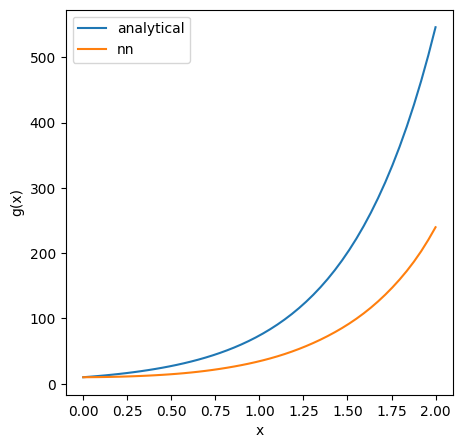

In [4]:
    # Plot the results
plt.figure(figsize=(5,5))

plt.plot(x, res_analytical)
plt.plot(x, res[0,:])
    plt.legend(['analytical','nn'])
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

In [347]:
print(g_trial(np.array([1.5]), P))
print(g_analytic(np.array([1.5])))

[[12.03120278]]
[12.25]
